In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import os
import scipy.io
from scipy import stats
%matplotlib inline

import octopus as oct

In [2]:
# Import GCamP6f data

R20D01_GC6f_Ftrace_mean = np.load('R20D01_GC6f_Ftrace_mean.npy')
R20D01_GC6f_MOI = np.load('R20D01_GC6f_MOI.npy')
R20D01_GC6f_LDir = np.load('R20D01_GC6f_LDir.npy')
R20D01_GC6f_R_deg = np.load('R20D01_GC6f_R_deg.npy')

R38G02_GC6f_Ftrace_mean = np.load('R38G02_GC6f_Ftrace_mean.npy')
R38G02_GC6f_MOI = np.load('R38G02_GC6f_MOI.npy')
R38G02_GC6f_LDir = np.load('R38G02_GC6f_LDir.npy')
R38G02_GC6f_R_deg = np.load('R38G02_GC6f_R_deg.npy')

R24E09_GC6f_Ftrace_mean = np.load('R24E09_GC6f_Ftrace_mean.npy')
R24E09_GC6f_MOI = np.load('R24E09_GC6f_MOI.npy')
R24E09_GC6f_LDir = np.load('R24E09_GC6f_LDir.npy')
R24E09_GC6f_R_deg = np.load('R24E09_GC6f_R_deg.npy')

SplitT4c_GC6f_Ftrace_mean = np.load('SplitT4c_GC6f_Ftrace_mean_axons.npy')
SplitT4c_GC6f_MOI = np.load('SplitT4c_GC6f_MOI_axons.npy')
SplitT4c_GC6f_LDir = np.load('SplitT4c_GC6f_LDir_axons.npy')
SplitT4c_GC6f_R_deg = np.load('SplitT4c_GC6f_R_deg_axons.npy')

In [3]:
# Import ArcLight data

R20D01_ArcLight_Ftrace_mean = np.load('R20D01_Ftrace_mean_voltage.npy')
R20D01_ArcLight_MOI = np.load('R20D01_MOI_voltage.npy')
R20D01_ArcLight_LDir = np.load('R20D01_LDir_voltage.npy')
R20D01_ArcLight_R_deg = np.load('R20D01_R_deg_voltage.npy')

R38G02_ArcLight_Ftrace_mean = np.load('R38G02_Ftrace_mean_voltage.npy')
R38G02_ArcLight_MOI = np.load('R38G02_MOI_voltage.npy')
R38G02_ArcLight_LDir = np.load('R38G02_LDir_voltage.npy')
R38G02_ArcLight_R_deg = np.load('R38G02_R_deg_voltage.npy')

R24E09_ArcLight_Ftrace_mean = np.load('R24E09_Ftrace_mean_voltage.npy')
R24E09_ArcLight_MOI = np.load('R24E09_MOI_voltage.npy')
R24E09_ArcLight_LDir = np.load('R24E09_LDir_voltage.npy')
R24E09_ArcLight_R_deg = np.load('R24E09_R_deg_voltage.npy')

SplitT4c_ArcLight_Ftrace_mean = np.load('SplitT4c_Ftrace_mean_voltage.npy')
SplitT4c_ArcLight_MOI = np.load('SplitT4c_MOI_voltage.npy')
SplitT4c_ArcLight_LDir = np.load('SplitT4c_LDir_voltage.npy')
SplitT4c_ArcLight_R_deg = np.load('SplitT4c_R_deg_voltage.npy')

# Import Ephys Data
R24E09_Ephys_mean = np.load('R24E09_ArcLight_meandata_align.npy')

In [4]:
rotations = [0,45,90,135,180,225,270,315,360]

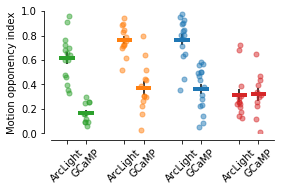

In [5]:
# Make Scatter Plot of MOI

#pos = [0, 1, 2.5, 3.5, 5, 6, 7.5, 8.5]

pos = [0, 1, 3, 4, 6, 7, 9, 10]

fig = plt.figure(figsize = (0.5*len(pos), 2.25))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6
data = [R24E09_ArcLight_MOI, R24E09_GC6f_MOI, R20D01_ArcLight_MOI, R20D01_GC6f_MOI,
        R38G02_ArcLight_MOI, R38G02_GC6f_MOI, SplitT4c_ArcLight_MOI, SplitT4c_GC6f_MOI]

colors = ['C2', 'C2', 'C1', 'C1', 'C0', 'C0', 'C3', 'C3']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.plot([pos[j]-w/2, pos[j]+w/2],[np.mean(data[j]),np.mean(data[j])],
            color=colors[j], linestyle='-', linewidth = 4)
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color=colors[j], alpha=0.5, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('ArcLight','GCaMP', 'ArcLight','GCaMP', 'ArcLight','GCaMP', 'ArcLight','GCaMP',), rotation=45, size=10)
ax.set_ylabel('Motion opponency index', size=10)
plt.ylim([0,1])


bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\\
#FigS2_Voltage_vs_Ca_MOI.pdf',bbox_inches='tight', dpi=600, transparent=True)

plt.show()

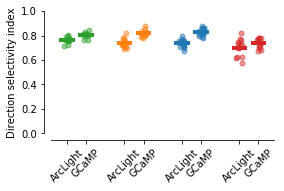

In [6]:
# Make Scatter Plot of LDir

#pos = [0, 1, 2.5, 3.5, 5, 6, 7.5, 8.5]

pos = [0, 1, 3, 4, 6, 7, 9, 10]

fig = plt.figure(figsize = (0.5*len(pos), 2.25))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6
data = [R24E09_ArcLight_LDir, R24E09_GC6f_LDir, R20D01_ArcLight_LDir, R20D01_GC6f_LDir,
        R38G02_ArcLight_LDir, R38G02_GC6f_LDir, SplitT4c_ArcLight_LDir, SplitT4c_GC6f_LDir]

colors = ['C2', 'C2', 'C1', 'C1', 'C0', 'C0', 'C3', 'C3']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.plot([pos[j]-w/2, pos[j]+w/2],[np.mean(data[j]),np.mean(data[j])],
            color=colors[j], linestyle='-', linewidth = 4)
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color=colors[j], alpha=0.5, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('ArcLight','GCaMP', 'ArcLight','GCaMP', 'ArcLight','GCaMP', 'ArcLight','GCaMP',), rotation=45, size=10)
ax.set_ylabel('Direction selectivity index', size=10)
plt.ylim([0,1])

bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\
#FigS2_Voltage_vs_Ca_LDir.pdf',bbox_inches='tight', dpi=600, transparent=True)

plt.show()

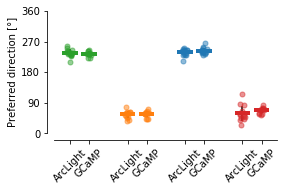

In [7]:
# Make Scatter Plot of R_deg

pos = [0, 1, 3, 4, 6, 7, 9, 10]


fig = plt.figure(figsize = (0.5*len(pos), 2.25))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6

data = [np.radians(R24E09_ArcLight_R_deg), np.radians(R24E09_GC6f_R_deg), np.radians(R20D01_ArcLight_R_deg),
        np.radians(R20D01_GC6f_R_deg), np.radians(R38G02_ArcLight_R_deg), np.radians(R38G02_GC6f_R_deg),
        np.radians(SplitT4c_ArcLight_R_deg), np.radians(SplitT4c_GC6f_R_deg)]

colors = ['C2', 'C2', 'C1', 'C1', 'C0', 'C0', 'C3', 'C3']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.plot([pos[j]-w/2, pos[j]+w/2],[stats.circmean(data[j]),stats.circmean(data[j])],
            color=colors[j], linestyle='-', linewidth = 4)
    ax.errorbar(pos[j],stats.circmean(data[j]),yerr=[stats.circstd(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color=colors[j], alpha=0.5, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('ArcLight','GCaMP', 'ArcLight','GCaMP', 'ArcLight','GCaMP', 'ArcLight','GCaMP',), rotation=45, size=10)
ax.set_yticks(np.radians(rotations[::2]))
ax.set_yticklabels(rotations[::2])
ax.set_ylabel(u'Preferred direction [°]', size=10)
plt.ylim([0,np.pi*2])

bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\\
#FigS2_Voltage_vs_Ca_R_deg.pdf',bbox_inches='tight', dpi=600, transparent=True)

plt.show()

In [8]:
print(stats.levene(R24E09_ArcLight_MOI, R24E09_GC6f_MOI))
print(stats.levene(R20D01_ArcLight_MOI, R20D01_GC6f_MOI))
print(stats.levene(R38G02_ArcLight_MOI, R38G02_GC6f_MOI))
print(stats.levene(SplitT4c_ArcLight_MOI, SplitT4c_GC6f_MOI))

print(stats.ttest_ind(R24E09_ArcLight_MOI, R24E09_GC6f_MOI, equal_var=True))
print(stats.ttest_ind(R20D01_ArcLight_MOI, R20D01_GC6f_MOI, equal_var=True))
print(stats.ttest_ind(R38G02_ArcLight_MOI, R38G02_GC6f_MOI, equal_var=True))
print(stats.ttest_ind(SplitT4c_ArcLight_MOI, SplitT4c_GC6f_MOI, equal_var=True))

LeveneResult(statistic=4.162731027420552, pvalue=0.052472559150980674)
LeveneResult(statistic=1.693656957415887, pvalue=0.20547456661606558)
LeveneResult(statistic=0.2162522447743039, pvalue=0.645383507301053)
LeveneResult(statistic=0.029016792736005537, pvalue=0.8662971016675098)
Ttest_indResult(statistic=7.355100188071081, pvalue=1.3514215639699052e-07)
Ttest_indResult(statistic=6.06085102793843, pvalue=2.9343293738807865e-06)
Ttest_indResult(statistic=6.270568219987911, pvalue=7.602835392640357e-07)
Ttest_indResult(statistic=-0.12078435559732134, pvalue=0.9049582019783982)


In [9]:
print(stats.levene(R24E09_ArcLight_LDir, R24E09_GC6f_LDir))
print(stats.levene(R20D01_ArcLight_LDir, R20D01_GC6f_LDir))
print(stats.levene(R38G02_ArcLight_LDir, R38G02_GC6f_LDir))
print(stats.levene(SplitT4c_ArcLight_LDir, SplitT4c_GC6f_LDir))

print(stats.ttest_ind(R24E09_ArcLight_LDir, R24E09_GC6f_LDir, equal_var=True))
print(stats.ttest_ind(R20D01_ArcLight_LDir, R20D01_GC6f_LDir, equal_var=True))
print(stats.ttest_ind(R38G02_ArcLight_LDir, R38G02_GC6f_LDir, equal_var=True))
print(stats.ttest_ind(SplitT4c_ArcLight_LDir, SplitT4c_GC6f_LDir, equal_var=True))

LeveneResult(statistic=0.013746900511178344, pvalue=0.907639870166063)
LeveneResult(statistic=1.1968574113863935, pvalue=0.284809686729236)
LeveneResult(statistic=0.17118047227152922, pvalue=0.6821087125659094)
LeveneResult(statistic=1.986712770624503, pvalue=0.17266505210915947)
Ttest_indResult(statistic=-4.292410154246123, pvalue=0.000251096577822946)
Ttest_indResult(statistic=-6.060627565951493, pvalue=2.9359381356145792e-06)
Ttest_indResult(statistic=-8.619782441990381, pvalue=1.712037842315767e-09)
Ttest_indResult(statistic=-1.4243402552878293, pvalue=0.1683790426348235)


In [10]:
print(stats.levene(R24E09_ArcLight_R_deg, R24E09_GC6f_R_deg))
print(stats.levene(R20D01_ArcLight_R_deg, R20D01_GC6f_R_deg))
print(stats.levene(R38G02_ArcLight_R_deg, R38G02_GC6f_R_deg))
print(stats.levene(SplitT4c_ArcLight_R_deg, SplitT4c_GC6f_R_deg))

print(stats.ttest_ind(R24E09_ArcLight_R_deg, R24E09_GC6f_R_deg, equal_var=True))
print(stats.ttest_ind(R20D01_ArcLight_R_deg, R20D01_GC6f_R_deg, equal_var=True))
print(stats.ttest_ind(R38G02_ArcLight_R_deg, R38G02_GC6f_R_deg, equal_var=True))
print(stats.ttest_ind(SplitT4c_ArcLight_R_deg, SplitT4c_GC6f_R_deg, equal_var=True))

LeveneResult(statistic=0.9520018147961625, pvalue=0.3389430793790523)
LeveneResult(statistic=0.3593213432381073, pvalue=0.5545006679878546)
LeveneResult(statistic=0.10683317127357717, pvalue=0.7461262348584963)
LeveneResult(statistic=2.873636673604265, pvalue=0.10415046692958675)
Ttest_indResult(statistic=0.6764204937343355, pvalue=0.5052409526154259)
Ttest_indResult(statistic=-0.2689050499302301, pvalue=0.7903009134031629)
Ttest_indResult(statistic=-1.4762524083258488, pvalue=0.15065313669303212)
Ttest_indResult(statistic=-1.0952473561022822, pvalue=0.2852542922656721)


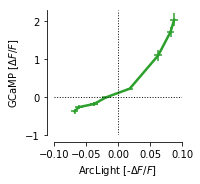

In [11]:
# Sort data
R24E09_data = np.empty([9, 4])
R24E09_data[:,0] = np.mean(R24E09_ArcLight_Ftrace_mean,1)
R24E09_data[:,1] = np.mean(R24E09_GC6f_Ftrace_mean,1)
R24E09_data[:,2] = stats.sem(R24E09_ArcLight_Ftrace_mean,1)
R24E09_data[:,3] = stats.sem(R24E09_GC6f_Ftrace_mean,1)
R24E09_data_sorted = R24E09_data[R24E09_data[:, 0].argsort()]

fig = plt.figure(figsize = (2.3, 2.3))

ax = fig.add_subplot(111) #PLOT GC6f vs. Arclight

ax.axvline(x=0,ymin=0.0001,ymax=0.9999, color='0.05', linestyle=':', linewidth = 1)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)
plt.plot(R24E09_data_sorted[:,0], R24E09_data_sorted[:,1], color='C2', linewidth = 2.5, zorder = 0)
plt.errorbar(R24E09_data_sorted[:,0], R24E09_data_sorted[:,1],
             xerr=R24E09_data_sorted[:,2], yerr=R24E09_data_sorted[:,3], fmt='none', color='C2', linewidth = 1.5, zorder = 1)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
#for axis in ['top','bottom','left','right']:
#  ax.spines[axis].set_linewidth(0.5)
ax.set_xlabel('ArcLight [-$\Delta F/F$]', fontsize = 10)
ax.set_ylabel('GCaMP [$\Delta F/F$]', fontsize = 10)
plt.xlim([-0.1, 0.1])
plt.ylim([-1, 2.3])
ax.tick_params(axis='both', which='major', labelsize=10)

bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\
#FigS2_R24E09_Rectification.pdf',bbox_inches='tight', dpi=600, transparent=True)

plt.show()

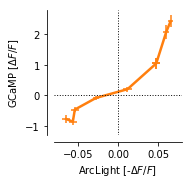

In [13]:
# Sort data
R20D01_data = np.empty([9, 4])
R20D01_data[:,0] = np.mean(R20D01_ArcLight_Ftrace_mean,1)
R20D01_data[:,1] = np.mean(R20D01_GC6f_Ftrace_mean,1)
R20D01_data[:,2] = stats.sem(R20D01_ArcLight_Ftrace_mean,1)
R20D01_data[:,3] = stats.sem(R20D01_GC6f_Ftrace_mean,1)
R20D01_data_sorted = R20D01_data[R20D01_data[:, 0].argsort()]

fig = plt.figure(figsize = (2.3, 2.3))

ax = fig.add_subplot(111) #PLOT GC6f vs. Arclight

ax.axvline(x=0,ymin=0.0001,ymax=0.9999, color='0.05', linestyle=':', linewidth = 1)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)
plt.plot(R20D01_data_sorted[:,0], R20D01_data_sorted[:,1], color='C1', linewidth = 2.5, zorder = 0)
plt.errorbar(R20D01_data_sorted[:,0], R20D01_data_sorted[:,1],
             xerr=R20D01_data_sorted[:,2], yerr=R20D01_data_sorted[:,3], fmt='none', color='C1', linewidth = 1.5, zorder = 1)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
#for axis in ['top','bottom','left','right']:
#  ax.spines[axis].set_linewidth(0.5)
ax.set_xlabel('ArcLight [-$\Delta F/F$]', fontsize = 10)
ax.set_ylabel('GCaMP [$\Delta F/F$]', fontsize = 10)
plt.xlim([-0.08, 0.08])
plt.ylim([-1.3, 2.8])
ax.tick_params(axis='both', which='major', labelsize=10)

bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\
#FigS2_R20D01_Rectification.pdf',bbox_inches='tight', dpi=600, transparent=True)

plt.show()

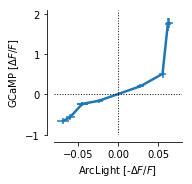

In [14]:
# Sort data
R38G02_data = np.empty([9, 4])
R38G02_data[:,0] = np.mean(R38G02_ArcLight_Ftrace_mean,1)
R38G02_data[:,1] = np.mean(R38G02_GC6f_Ftrace_mean,1)
R38G02_data[:,2] = stats.sem(R38G02_ArcLight_Ftrace_mean,1)
R38G02_data[:,3] = stats.sem(R38G02_GC6f_Ftrace_mean,1)
R38G02_data_sorted = R38G02_data[R38G02_data[:, 0].argsort()]

fig = plt.figure(figsize = (2.3, 2.3))

ax = fig.add_subplot(111) #PLOT GC6f vs. Arclight

ax.axvline(x=0,ymin=0.0001,ymax=0.9999, color='0.05', linestyle=':', linewidth = 1)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)
plt.plot(R38G02_data_sorted[:,0], R38G02_data_sorted[:,1], color='C0', linewidth = 2.5, zorder = 0)
plt.errorbar(R38G02_data_sorted[:,0], R38G02_data_sorted[:,1],
             xerr=R38G02_data_sorted[:,2], yerr=R38G02_data_sorted[:,3], fmt='none', color='C0', linewidth = 1.5, zorder = 1)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
#for axis in ['top','bottom','left','right']:
#  ax.spines[axis].set_linewidth(0.5)
ax.set_xlabel('ArcLight [-$\Delta F/F$]', fontsize = 10)
ax.set_ylabel('GCaMP [$\Delta F/F$]', fontsize = 10)
plt.xlim([-0.08, 0.08])
plt.ylim([-1, 2.1])
ax.tick_params(axis='both', which='major', labelsize=10)

bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\
#FigS2_R38G02_Rectification.pdf',bbox_inches='tight', dpi=600, transparent=True)

plt.show()

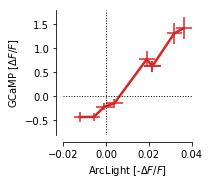

In [15]:
# Sort data
SplitT4c_data = np.empty([9, 4])
SplitT4c_data[:,0] = np.mean(SplitT4c_ArcLight_Ftrace_mean,1)
SplitT4c_data[:,1] = np.mean(SplitT4c_GC6f_Ftrace_mean,1)
SplitT4c_data[:,2] = stats.sem(SplitT4c_ArcLight_Ftrace_mean,1)
SplitT4c_data[:,3] = stats.sem(SplitT4c_GC6f_Ftrace_mean,1)
SplitT4c_data_sorted = SplitT4c_data[SplitT4c_data[:, 0].argsort()]

fig = plt.figure(figsize = (2.3, 2.3))

ax = fig.add_subplot(111) #PLOT GC6f vs. Arclight

ax.axvline(x=0,ymin=0.0001,ymax=0.9999, color='0.05', linestyle=':', linewidth = 1)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)
plt.plot(SplitT4c_data_sorted[:,0], SplitT4c_data_sorted[:,1], color='C3', linewidth = 2.5, zorder = 0)
plt.errorbar(SplitT4c_data_sorted[:,0], SplitT4c_data_sorted[:,1],
             xerr=SplitT4c_data_sorted[:,2], yerr=SplitT4c_data_sorted[:,3], fmt='none', color='C3', linewidth = 1.5, zorder = 1)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
#for axis in ['top','bottom','left','right']:
#  ax.spines[axis].set_linewidth(0.5)
ax.set_xlabel('ArcLight [-$\Delta F/F$]', fontsize = 10)
ax.set_ylabel('GCaMP [$\Delta F/F$]', fontsize = 10)
plt.xlim([-0.02, 0.04])
plt.ylim([-0.8, 1.8])
ax.tick_params(axis='both', which='major', labelsize=10)

bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\
#FigS2_SplitT4c_Rectification.pdf',bbox_inches='tight', dpi=600, transparent=True)

plt.show()

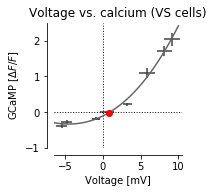

In [16]:
# Sort data
R24E09_ephys_data = np.empty([9, 4])
R24E09_ephys_data[:,0] = np.mean(R24E09_Ephys_mean,1)
R24E09_ephys_data[:,1] = np.mean(R24E09_GC6f_Ftrace_mean,1)
R24E09_ephys_data[:,2] = stats.sem(R24E09_Ephys_mean,1)
R24E09_ephys_data[:,3] = stats.sem(R24E09_GC6f_Ftrace_mean,1)
R24E09_ephys_data_sorted = R24E09_ephys_data[R24E09_ephys_data[:, 0].argsort()]

#Fit polynomial to data
x = R24E09_ephys_data_sorted[:,0]
y = R24E09_ephys_data_sorted[:,1]
polynom = np.poly1d(np.polyfit(x, y, 3))
t = np.linspace(-6.5, 10, 100)

fig = plt.figure(figsize = (2.3, 2.3))

ax = fig.add_subplot(111) #PLOT GC6f vs. Arclight

ax.axvline(x=0,ymin=0.0001,ymax=0.9999, color='0.05', linestyle=':', linewidth = 1)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)
#plt.plot(R24E09_ephys_data_sorted[:,0], R24E09_ephys_data_sorted[:,1], color='C2', linewidth = 2.5, zorder = 0)
plt.errorbar(R24E09_ephys_data_sorted[:,0], R24E09_ephys_data_sorted[:,1],
             xerr=R24E09_ephys_data_sorted[:,2], yerr=R24E09_ephys_data_sorted[:,3], fmt='none', color='0.25', linewidth = 1.5, zorder = 1)

plt.plot(t, polynom(t), '-', color='0.4')
plt.plot([0.796], polynom(0.796), 'o', color='r')

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
#for axis in ['top','bottom','left','right']:
#  ax.spines[axis].set_linewidth(0.5)
ax.set_xlabel('Voltage [mV]', fontsize = 10)
ax.set_ylabel('GCaMP [$\Delta F/F$]', fontsize = 10)
plt.xlim([-6.5, 10.5])
plt.ylim([-1, 2.5])
ax.tick_params(axis='both', which='major', labelsize=10)
plt.title('Voltage vs. calcium (VS cells)')
bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\LPi Manuscript\\REVISION_NN\\Images for Reviewer\\
#R24E09_Ephys_GC6f_polynomial.png',bbox_inches='tight', dpi=600, transparent=True)

plt.show()

In [17]:
# Calculate calcium change for local TM
print(polynom(0.7963742989155178))
print(polynom(0.7963742989155178)/np.max(R24E09_ephys_data_sorted[:,1])*100)

-0.017130113565757846
-0.8413186559397854


In [19]:
# Calculate calcium change for global TM
print(polynom(0.7577443311060651))
print(polynom(0.7577443311060651)/np.max(R24E09_ephys_data_sorted[:,1])*100)

-0.021931328861139326
-1.0771228135527464
